<a href="https://colab.research.google.com/github/abhisheksingh1234/Security-Research-/blob/master/bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import json

# Input and output file paths
input_file_path = 'bs.json'
output_file_path = 'cleaned_output.json'

# Initialize a list to store cleaned JSON objects
cleaned_json_data = []

# Open the input JSON file for reading
with open(input_file_path, 'r') as input_file:
    json_object = ''

    # Iterate through each line in the file
    for line in input_file:
        # Append the current line to the json_object
        json_object += line.strip()

        try:
            # Try to parse the JSON object
            parsed_json = json.loads(json_object)
            cleaned_json_data.append(parsed_json)

            # If parsing is successful, reset json_object
            json_object = ''
        except json.JSONDecodeError:
            # If parsing fails, continue reading more lines
            pass

# Write the cleaned JSON data to the output file
with open(output_file_path, 'w') as output_file:
    json.dump(cleaned_json_data, output_file, indent=2)

print("JSON file cleaned and saved to", output_file_path)


JSON file cleaned and saved to cleaned_output.json


In [ ]:
import pandas as pd

# Specify the path to your JSON file
file_name = 'cleaned_output.json'

df = pd.read_json('cleaned_output.json')

# Drop duplicate Entries
df = df.drop_duplicates(subset='ip', keep='first')
df = df.reset_index(drop=True)
df.head()
#num_rows = len(df)
#print(num_rows)
#data = df['data']
#print(data)


,ip,timestamp,data,error,error_component
0,216.246.16.81,2016-12-15 02:30:20-05:00,{'tls': {'server_hello': {'version': {'name': ...,NaN,NaN
1,198.232.124.248,2016-12-15 02:30:21-05:00,{'tls': {'server_hello': {'version': {'name': ...,NaN,NaN
2,104.74.19.138,2016-12-15 02:30:20-05:00,{'tls': {'server_hello': {'version': {'name': ...,NaN,NaN
3,129.121.138.239,2016-12-15 02:30:20-05:00,{'tls': {'server_hello': {'version': {'name': ...,NaN,NaN
4,67.43.5.87,2016-12-15 02:30:20-05:00,{'tls': {'server_hello': {'version': {'name': ...,NaN,NaN


In [ ]:
import pandas as pd

import ipaddress

# Define a list of private IP address ranges
private_ip_ranges = [
    ipaddress.IPv4Network('10.0.0.0/8'),
    ipaddress.IPv4Network('172.16.0.0/12'),
    ipaddress.IPv4Network('192.168.0.0/16'),
    ipaddress.IPv4Network('169.254.0.0/16'),
    ipaddress.IPv6Network('fd00::/8'),
    ipaddress.IPv6Network('fc00::/7'),
]

# Function to check if an IP address is internal
def is_internal_ip(ip_str):
    try:
        ip = ipaddress.IPv4Address(ip_str) if '.' in ip_str else ipaddress.IPv6Address(ip_str)
        for private_range in private_ip_ranges:
            if ip in private_range:
                return True
        return False
    except ipaddress.AddressValueError:
        return False


In [ ]:
num_of_rows = len(df)
print(num_of_rows)
internal_ip = 0
external_ip = 0
for number in range(num_of_rows):
  if is_internal_ip(df['ip'][number]) == True :
    internal_ip = internal_ip + 1
  else:
    external_ip = external_ip + 1

print(f"internal ip {internal_ip}: external ip {external_ip}")

100000
internal ip 0: external ip 100000


In [ ]:
import json
from collections import defaultdict
data = df['data']
num_of_rows = len(df)
print(num_of_rows)
unique_tls_versions = set()
tls_version_counts = defaultdict(int)
for number in range(num_of_rows):
    json_data = df['data'][number]
    tls_server_hello_version_name = json_data.get('tls', {}).get('server_hello', {}).get('version', {}).get('name', 'N/A')
    if tls_server_hello_version_name != 'N/A':
           print(f"Row {number}: tls_server_hello_version_name: {tls_server_hello_version_name}")

    else:
           print(f"Row {number}: tls_server_hello_version_name not found")
    if tls_server_hello_version_name != 'N/A':
            unique_tls_versions.add(tls_server_hello_version_name)
    if tls_server_hello_version_name != 'N/A':
            tls_version_counts[tls_server_hello_version_name] += 1


Streaming output truncated to the last 5000 lines.
Row 95000: tls_server_hello_version_name: TLSv1.2
Row 95001: tls_server_hello_version_name: TLSv1.2
Row 95002: tls_server_hello_version_name: TLSv1.0
Row 95003: tls_server_hello_version_name: TLSv1.2
Row 95004: tls_server_hello_version_name: TLSv1.0
Row 95005: tls_server_hello_version_name: TLSv1.2
Row 95006: tls_server_hello_version_name: TLSv1.2
Row 95007: tls_server_hello_version_name: TLSv1.0
Row 95008: tls_server_hello_version_name: TLSv1.0
Row 95009: tls_server_hello_version_name: TLSv1.2
Row 95010: tls_server_hello_version_name: TLSv1.2
Row 95011: tls_server_hello_version_name: TLSv1.2
Row 95012: tls_server_hello_version_name: TLSv1.0
Row 95013: tls_server_hello_version_name: TLSv1.2
Row 95014: tls_server_hello_version_name: TLSv1.2
Row 95015: tls_server_hello_version_name: TLSv1.0
Row 95016: tls_server_hello_version_name: TLSv1.0
Row 95017: tls_server_hello_version_name: TLSv1.2
Row 95018: tls_server_hello_version_name: TLSv1.2

In [ ]:
for version, count in tls_version_counts.items():
    print(f"TLS Version: {version}, Count: {count}")

TLS Version: TLSv1.2, Count: 51768
TLS Version: TLSv1.0, Count: 28975
TLS Version: SSLv3, Count: 1005
TLS Version: TLSv1.1, Count: 686


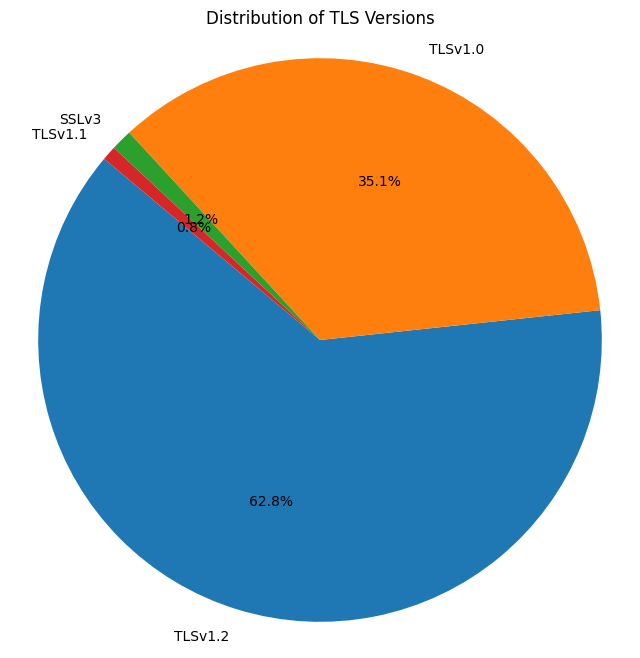

In [ ]:
import matplotlib.pyplot as plt
tls_versions = list(tls_version_counts.keys())
counts = list(tls_version_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=tls_versions, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TLS Versions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:
import json
file_name = 'cleaned_output.json'
with open(file_name,'r') as json_file:
  parsed_data = json.load(json_file)
print(parsed_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Compute cipher suite Usage

for number in range(num_of_rows):
    json_data = df['data'][number]
    print(json_data)
    tls_server_hello_cipher_suite_name = json_data.get('tls', {}).get('server_hello', {}).get('cipher_suite', {}).get('name', 'N/A')
    if tls_server_hello_cipher_suite_name != 'N/A':
           print(f"Row {number}: tls_server_hello_cipher_suite_name: {tls_server_hello_cipher_suite_name}")





In [ ]:
for version, count in cipher_version_counts.items():
    print(f"TLS Version: {version}, Count: {count}")

TLS Version: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256, Count: 32689
TLS Version: TLS_DHE_RSA_WITH_AES_256_CBC_SHA, Count: 6299
TLS Version: TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA, Count: 8583
TLS Version: TLS_RSA_WITH_AES_256_CBC_SHA, Count: 17926
TLS Version: TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256, Count: 880
TLS Version: TLS_RSA_WITH_RC4_128_SHA, Count: 2739
TLS Version: TLS_RSA_WITH_AES_128_CBC_SHA, Count: 2772
TLS Version: TLS_RSA_WITH_AES_128_GCM_SHA256, Count: 6570
TLS Version: TLS_DHE_RSA_WITH_AES_128_GCM_SHA256, Count: 1501
TLS Version: TLS_DHE_RSA_WITH_AES_128_CBC_SHA, Count: 229
TLS Version: TLS_ECDHE_RSA_WITH_AES_128_CBC_SHA, Count: 293
TLS Version: TLS_RSA_WITH_RC4_128_MD5, Count: 1582
TLS Version: TLS_RSA_WITH_3DES_EDE_CBC_SHA, Count: 269
TLS Version: TLS_ECDHE_RSA_WITH_RC4_128_SHA, Count: 91
TLS Version: TLS_ECDHE_ECDSA_WITH_AES_256_CBC_SHA, Count: 3
TLS Version: TLS_ECDHE_RSA_WITH_CHACHA20_POLY1305_SHA256, Count: 8


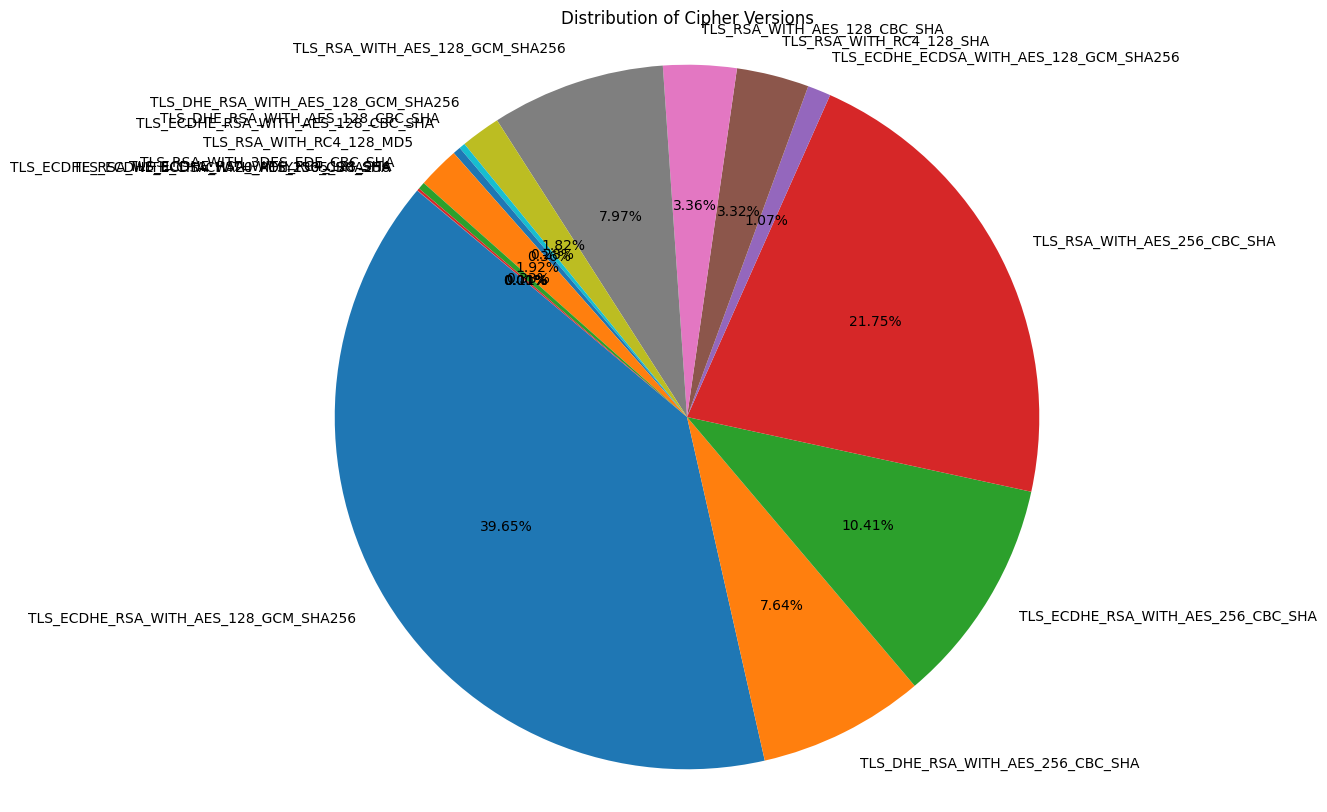

In [ ]:
import matplotlib.pyplot as plt
tls_versions = list(cipher_version_counts.keys())
counts = list(cipher_version_counts.values())

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=tls_versions, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Cipher Versions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:
# Check for Valid Certificates
#"signature": {
#              "signature_algorithm": {
#               "name": "SHA1WithRSA",
#                "oid": "1.2.840.113549.1.1.5"
#             },
#             "value": "iBcslepMUhQ1fyUQ+jFRb9poHNfPGJuWEM5s5Q5N6UheJbMSmVOFpCVQnSPImOV5mb2UTZzkaTWECt30d62JrjbdAQNvcY/YYBq4RBgTKH8epkgrc28/WWwOqdGJCYYQHWnIb4TroZwnSh2mcm3xP5fVyQTGXp8W9A+J1l6tZR/lF9JlXFb+McqtWoYZXjm/cR1a+PulYMgVF97tXXLx3MwpjwBImh1iLzPShBVkez7Pk7wqxVRpJ5GgDyWTkf6j3uhA/p6q53IDe2XHJ54kd64oQY+LQVbJe4JvNBB1swyI4VuOV6+X8Y3rsXY3pFBs4GWOlfWPYvbZZN/c8rM+Zg==",
#              "valid": false,
#              "self_signed": false
#            },

test_rows = 2
true_count = 0  # This denotes Valid Certificates
false_count = 0 # This denotes Invalid Certifiates
for number in range(num_of_rows):
    json_data = df['data'][number]
    #print(json_data)
    parsed_certificate_validity = json_data.get('tls', {}).get('server_certificates', {}).get('certificate', {}).get('parsed', {}).get('signature', {}).get('valid', {})
    if parsed_certificate_validity is not None:
        #print(parsed_certificate_validity)
        if parsed_certificate_validity is True:
            true_count += 1
        elif parsed_certificate_validity is False:
            false_count += 1

print("Count of True:", true_count)
print("Count of False:", false_count)

Count of True: 52991
Count of False: 29028


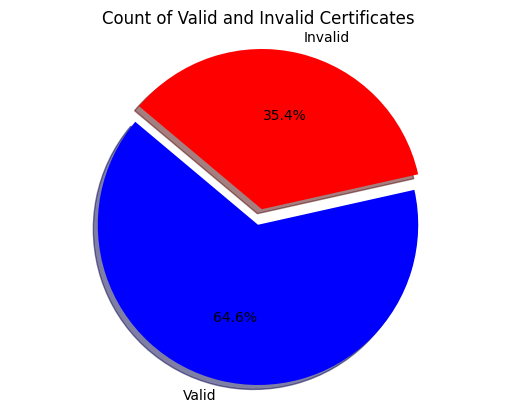

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Valid', 'Invalid']
sizes = [52991, 29028]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the 1st slice (True)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title("Count of Valid and Invalid Certificates")

# Show the pie chart
plt.show()

In [ ]:
test_rows = 2
true_count = 0  # This denotes Valid Certificates
false_count = 0 # This denotes Invalid Certifiates
for number in range(num_of_rows):
    json_data = df['data'][number]
    #print(json_data)  # Added for Debugging
    self_signed = json_data.get('tls', {}).get('server_certificates', {}).get('certificate', {}).get('parsed', {}).get('signature', {}).get('self_signed', {})
    if self_signed is not None:
        #print(parsed_certificate_validity)  #Added for Debugging
        if self_signed is True:
            true_count += 1
        elif self_signed is False:
            false_count += 1

print("Count of True:", true_count)
print("Count of False:", false_count)

Count of True: 27117
Count of False: 54902


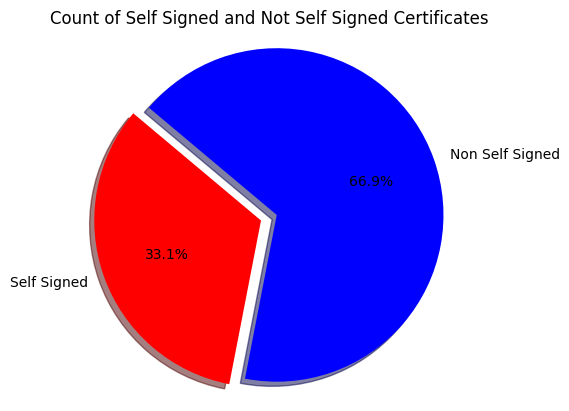

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Self Signed', 'Non Self Signed']
sizes = [27117, 54902]
colors = ['red', 'blue']
explode = (0.1, 0)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title("Count of Self Signed and Not Self Signed Certificates")

# Show the pie chart
from collections import Counterplt.show()

In [ ]:
from collections import Counter
server_random_hello_values = []
server_random_hello_counter = Counter()

for number in range(num_of_rows):
    json_data = df['data'][number]
    server_random_hello = json_data.get('tls', {}).get('server_hello', {}).get('random', {})


    if server_random_hello:
        # Convert the dictionary to a hashable object
        server_random_hello_values.append(server_random_hello)

        # Append it to the list
        server_random_hello_counter[server_random_hello] += 1

for value, count in server_random_hello_counter.items():
    if count > 1:
        print(f"Value: {value}, Count: {count}")





Value: WFJGmkw64/euxsZTLjrW//7T87jivO7pv9vKwjqXx7U=, Count: 2
Value: WFJGmyuKJYQef8Z1ckLaXSanP+lWm11Q0fyt3cIsrM4=, Count: 4
Value: WFJGpzIGEFzEBozLD5MyBF4qo7OIZ9ZZORZhpvZ3i+g=, Count: 3
Value: WFJGqVeRXiIg2GuRLJsn/t9D/ORlpCBsxw6e++/MKl8=, Count: 2
Value: WFJGqjrYpZyAoPxqNf/jPG27GKVqveAwvh29rCthLN0=, Count: 3
Value: WFJGrVj9YZl1nhE8DEF8f5lzCDr6TQd58PoV1nY2lrc=, Count: 2
Value: WFJGr1iADWQieSJyw32nQw0o37CMPNb5PK6SfEWEEMU=, Count: 4
Value: WFJGu23Cnt/Y6cx/nE69CDiP9+V20ze5uYctJzMxVtY=, Count: 2
Value: WFJGxNktJ3sCOnZYtqt6a/YjdpdVRz+w7vzJcd3d4O8=, Count: 2
Value: WFJGxVmUvkNYy/8iVBz1CoKoy9O4DHBuRBQUGv5zV7Y=, Count: 2
Value: WFJG2rYJNf1GbfgQG8K9WuHS/86XBj4EZvDHYAlz3Zg=, Count: 2
Value: WFJG8JShFABZDkwnKtkxpk00GauWN/MMHSEyboQZJmE=, Count: 2
Value: WFJG8ZiU9a3bAnB7OwL/Lo5QdRO5TNdxosAV1I1Xpko=, Count: 3
Value: ZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmY=, Count: 3
Value: WFJG9lcH1wSfbDSaI/eGdxSAU2yA3MA6R/AzSTDjN9c=, Count: 3
Value: WFJG+agYNPW3P+wpJlvHU5qOtocH5XJsa3DDDEPOuEc=, Count: 2
Value: W

In [ ]:

#Value: WFJGr1iADWQieSJyw32nQw0o37CMPNb5PK6SfEWEEMU=,
#Value: WFJGmyuKJYQef8Z1ckLaXSanP+lWm11Q0fyt3cIsrM4=
#For these two values get the Cipher used in the connection

target_server_random_hello_1 = "WFJGmyuKJYQef8Z1ckLaXSanP+lWm11Q0fyt3cIsrM4="
target_server_random_hello_2 = "WFJGr1iADWQieSJyw32nQw0o37CMPNb5PK6SfEWEEMU="

for number in range(num_of_rows):
    json_data = df['data'][number]
    server_random_hello = json_data.get('tls', {}).get('server_hello', {}).get('random', {})

    if server_random_hello == target_server_random_hello_1 or server_random_hello == target_server_random_hello_2:
        print(json_data.get('tls', {}).get('server_hello', {}).get('cipher_suite', {}).get('name', 'N/A'))



TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA
TLS_RSA_WITH_RC4_128_SHA


In [ ]:
pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
# How many unique registerable domains are present as certificate alternative DNS names in the
# leaf certificates?
import tldextract
unique_registerable_domains = set()
for number in range(num_of_rows):
    json_data = df['data'][number]
    alternative_dns_names = json_data.get('tls', {}).get('server_certificates', {}).get('certificate', {}).get('parsed', {}).get('extensions', {}).get('subject_alt_name', {}).get('dns_names', {})
    for dns_name in alternative_dns_names:
        ext = tldextract.extract(dns_name)
        if ext.registered_domain:
            unique_registerable_domains.add(ext.registered_domain)

count_unique_domains = len(unique_registerable_domains)
print(f"Count of Unique Registerable Domains: {count_unique_domains}")

Count of Unique Registerable Domains: 50671
